# Step- 1 : Business problem Understanding
- Portuguese bank marketing historical data to predict term deposit subscriptions.

- The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

- The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

# Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Dataset

**Input variables**:

- **age** :(numeric)

- **job** : type of job (categorical:"admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","selfemployed","retired","technician","services")

- **marital** : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

- **education**: (categorical: "unknown","secondary","primary","tertiary")

- **default**: has credit in default? (binary: "yes","no")

- **balance**: average yearly balance, in euros (numeric)

- **housing**: has housing loan? (binary: "yes","no")

- **loan**: has personal loan? (binary: "yes","no")

- **contact**: contact communication type (categorical: "unknown","telephone","cellular")

- **day**: last contact day of the month (numeric)

- **month**: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

- **duration**: last contact duration, in seconds (numeric)

- **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)

- **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

- **previous**: number of contacts performed before this campaign and for this client (numeric)

- **poutcome**: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

**Output variable (desired target):**

- **y** - has the client subscribed a term deposit? (binary: "yes","no")



In [2]:
train_data = pd.read_csv(r"D:\Bank Marketing project\Train.csv")
train_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
test_data = pd.read_csv(r"D:\Bank Marketing project\Test (1).csv") 
test_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Step - 2: Data Understanding

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
train_data.shape, test_data.shape

((45211, 17), (4521, 17))

In [7]:
train_data.columns,test_data.columns

(Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'y'],
       dtype='object'),
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'y'],
       dtype='object'))

# Exploraory Data Analysis

In [8]:
train_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
test_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


**Unique Values in string Columns**

In [10]:
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        print(f'{column}: {train_data[column].unique()}')

job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'failure' 'other' 'success']
y: ['no' 'yes']


In [11]:
for column in test_data.columns:
    if test_data[column].dtype == 'object':
        print(f'{column}: {test_data[column].unique()}')


job: ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital: ['married' 'single' 'divorced']
education: ['primary' 'secondary' 'tertiary' 'unknown']
default: ['no' 'yes']
housing: ['no' 'yes']
loan: ['no' 'yes']
contact: ['cellular' 'unknown' 'telephone']
month: ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome: ['unknown' 'failure' 'other' 'success']
y: ['no' 'yes']


**Data Visulaization**

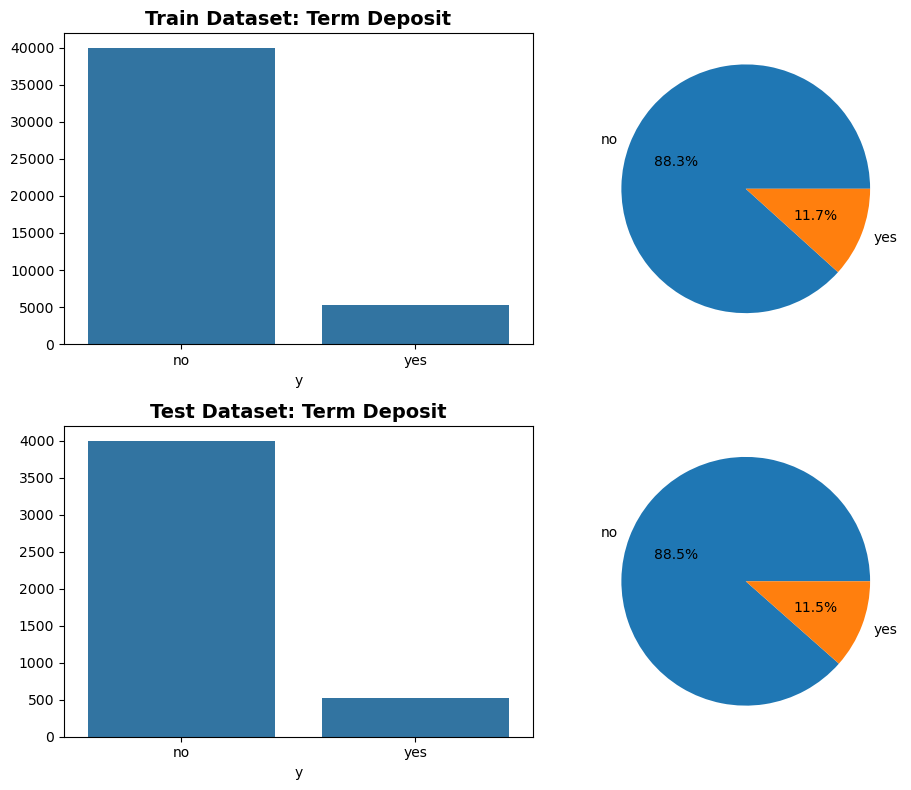

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

term_deposit_train = train_data['y'].value_counts()
sns.barplot(x=term_deposit_train.index, y= term_deposit_train.values, ax=axes[0,0])

axes[0,0].set_title("Train Dataset: Term Deposit",fontsize=14, weight='bold')
axes[0, 1].pie(term_deposit_train, labels=term_deposit_train.index.astype(str), autopct='%1.1f%%')

term_deposit_test = test_data['y'].value_counts()
sns.barplot(x=term_deposit_test.index, y= term_deposit_test.values, ax=axes[1,0])

axes[1,0].set_title("Test Dataset: Term Deposit",fontsize=14, weight='bold')
axes[1,1].pie(term_deposit_test, labels=term_deposit_test.index.astype(str), autopct='%1.1f%%')

plt.tight_layout()
plt.show()

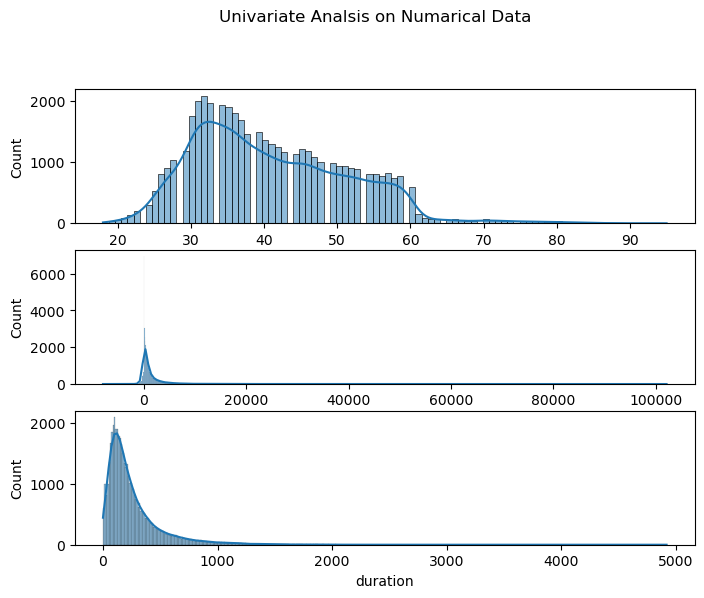

In [13]:
plt.rcParams['figure.figsize']=(8,8)

plt.subplot(4,1,1)
sns.histplot(train_data['age'],kde=True)

plt.subplot(4,1,2)
sns.histplot(train_data['balance'],kde=True)

plt.subplot(4,1,3)
sns.histplot(train_data['duration'],kde=True)

plt.suptitle("Univariate Analsis on Numarical Data")
plt.show()

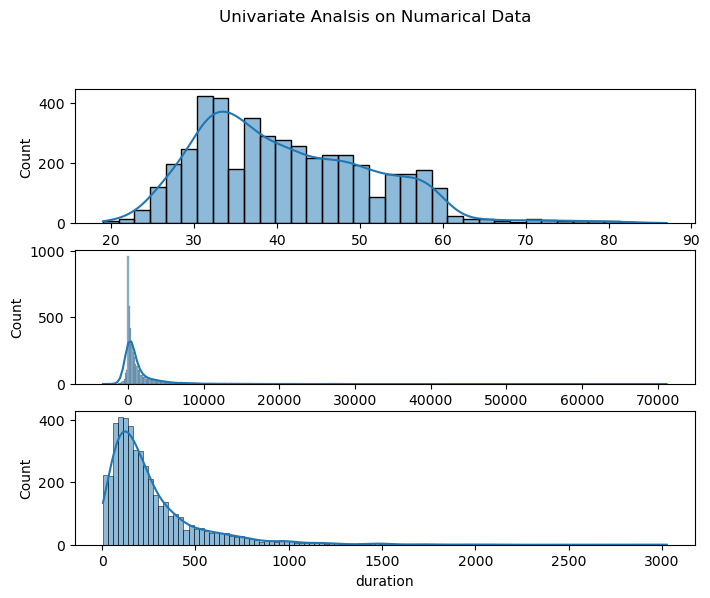

In [14]:
plt.rcParams['figure.figsize']=(8,8)

plt.subplot(4,1,1)
sns.histplot(test_data['age'],kde=True)

plt.subplot(4,1,2)
sns.histplot(test_data['balance'],kde=True)

plt.subplot(4,1,3)
sns.histplot(test_data['duration'],kde=True)

plt.suptitle("Univariate Analsis on Numarical Data")
plt.show()

# Step -3 :Data Preprocessing

**Checking Null Values**

In [15]:
train_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [16]:
test_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Checking Duplicates Values**

In [17]:
train_data.duplicated().sum(), test_data.duplicated().sum()

(0, 0)

**Encoding**

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for column in train_data.columns:
    if train_data[column].dtype == 'object':
        train_data[column] = encoder.fit_transform(train_data[column])
        test_data[column] = encoder.transform(test_data[column])


**Correlation**

In [19]:
corr = train_data.corr()
corr.style.background_gradient()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


**Split Dataset**

In [20]:
train_data = train_data.sample(frac = 1).reset_index(drop=True)
test_data = test_data.sample(frac = 1).reset_index(drop=True)

In [21]:
X_train, y_train = train_data.drop('y', axis = 1), train_data['y']
X_test, y_test = test_data.drop('y', axis = 1), test_data['y']

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((45211, 16), (4521, 16), (45211,), (4521,))

**Feature Sacling**

In [22]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)

# Modeling

In [23]:
def evaluation(y_test, y_pred):
    print(f"Model Accuracy: {metrics.accuracy_score(y_test, y_pred)*100:.2f}%")
    print(f"Classification Report:\n {metrics.classification_report(y_test, y_pred)}")
    cm = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, fmt = ".2f", xticklabels = ['No','Yes'], yticklabels = ['No','Yes'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label", fontsize = 15)
    plt.ylabel("Actual Label", fontsize = 15)


# Evaluation

**Classification Model**

Model Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00       521

    accuracy                           1.00      4521
   macro avg       1.00      1.00      1.00      4521
weighted avg       1.00      1.00      1.00      4521



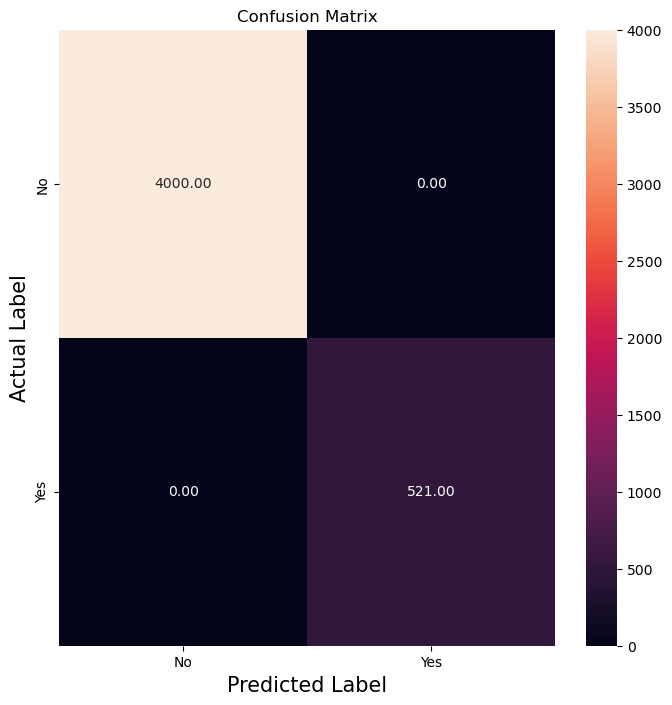

In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
evaluation(y_test, rfc_pred)


**Gradient Boosting Classifier**

Model Accuracy: 97.10%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      4000
           1       0.90      0.84      0.87       521

    accuracy                           0.97      4521
   macro avg       0.94      0.92      0.93      4521
weighted avg       0.97      0.97      0.97      4521



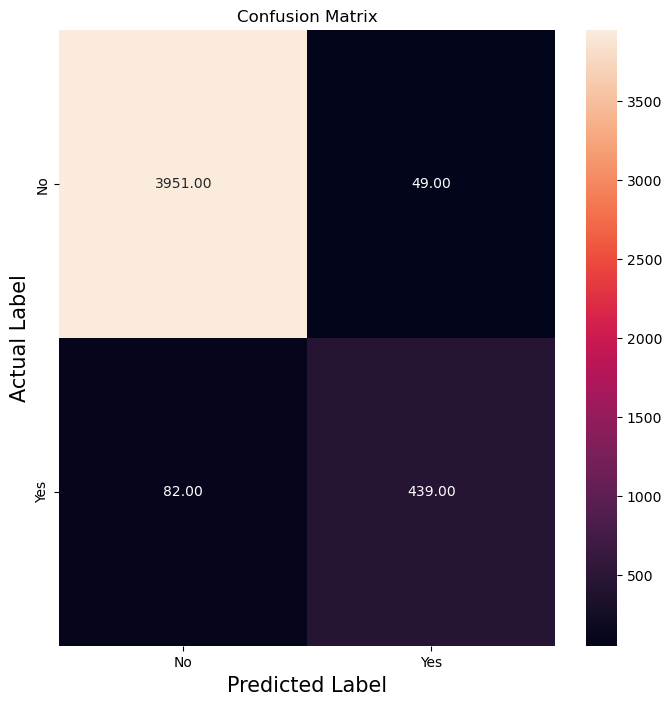

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(min_samples_split=20, min_samples_leaf=60, max_depth=30, max_features=20)
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
evaluation(y_test, gbc_pred)


**XGB Classifier**

Model Accuracy: 95.05%
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      4000
           1       0.84      0.70      0.77       521

    accuracy                           0.95      4521
   macro avg       0.90      0.84      0.87      4521
weighted avg       0.95      0.95      0.95      4521



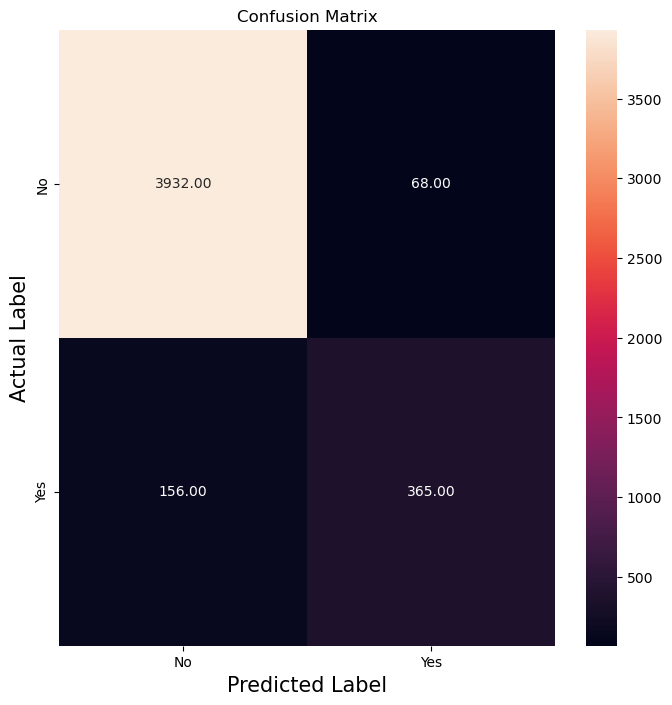

In [26]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
evaluation(y_test, xgb_pred)